# Final Project Proposal: How personal information made rigging the election cheap
**By**: Tejal Patwardhan
<hr style="height:2pt">

# Problem Description

In the United States, Facebook is a dominant platform for news sharing and civic engagement, making it an effective tool for foreign actors seeking to influence our elections. As reported by the New York Times, in 2016, over 126 million users viewed inflammatory Facebook posts created by Russian agents to sow election discord. In particular, the Internet Research Agency, a Russian company linked to the Kremlin, posted almost 80K pieces of such inflammatory content through Facebook pages. Facebook ultimately took down many of these pages, citing authenticity as a reason to remove, since these pages would impersonate domestic political groups and mislead the public about their identity. However, this scandal raises questions beyond authenticity and identity. How exactly did these pages operate, and how did they use the personal information shared by users on their pages to more effectively sow election discord?

https://intelligence.house.gov/social-media-content/social-media-advertisements.htm this the government release stuff

https://github.com/russian-ad-explorer/russian-ad-datasets this is the python that turned the PDFs into usable files, jsons


great data at bottom https://medium.com/@d1gi

data https://www.kaggle.com/paultimothymooney/russian-political-influence-campaigns/

someone's analysis https://simonwillison.net/2018/Aug/6/russian-facebook-ads/


nyt spot the deceptive FB post https://www.nytimes.com/interactive/2018/09/04/technology/facebook-influence-campaigns-quiz.html

# Data Collection and Description

Crowdtangle, a Facebook-owned social analytics service, published historical interaction and content data from the following removed Facebook pages linked 2016 Russian election meddling by the Internet Research Agency: `@blacktivists`, `@patriototus`, `@securedborders`, `@lgtbun`, `@muslimamerica`, and `@txrebels`. This data is now available through `data.world`. The data for each page includes full-text content of all page posts (>3000 total posts) and engagement metrics (likes, shares, comments) for each post.

Below is the metadata on what these Facebook pages looked like.

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [7]:
# import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt# display metadata from pages
data = pd.read_csv("data.csv")
data.head()

,Source,Page URL,Page Status,Total Shares,Interactions,Number of Posts,Word Count
0,Blacktivists,Facebook.com/Blacktivists,removed,"103,767,792","6,182,835",500+,"15,349"
1,Heart of Texas,Facebook.com/Txrebels,removed,"102,950,151","3,453,143",500+,no data
2,United Muslims of America,Facebook.Com/MuslimAmerica,removed,"71,355,895","2,128,875",500+,"6,892"
3,Being Patriotic,Facebook.Com/Patriototus,removed,"51,139,860","4,438,745",500+,"53,782"
4,Secured Borders,Facebook.Com/Secured.Borders,removed,"5,600,136","1,592,771",500+,"53,850"


# Methods

Data will be analyzed in Python using the `scikit-learn` package. The analysis will be broken into 3 parts:
1. Exploratory data analysis: this section of the code will help understand the data (histograms/boxplots of each feature by page, scatterplot matrices of features, trends over time). This will help contextualize what these pages looked like and what common trends were.
2. User information and page posts: this section of the code will be used to determine how the personal data of users engaging with these pages was used to target fake news towards them. Features about users (personal sentiments expressed on page, page engagement) will be used to try to predict future page posts (key word counts, sentiment). This will help build a model of how user data was used to inform the fake news targeted towards these users. A variety of prediction methods (regression, decision trees, random forest) will be considered to find a balance between an accurate but interpretable model of these relationships.
3. Effective textual analysis: this section of the code will be used to identify which types of posts were most effective in reaching users. Features including key words and sentiment of posts will be used as inputs in a predictive model on user engagement. Feature selection will then be used to determine what factors made the most effective fake news post.

This project will create a case study of how user data was used by Russian agents to formulate election-distorting Facebook pages, and what features made for the most effective posts on these pages. This will help shed light on how these pages operated so effectively in sowing election discord. Thank you!

In [503]:
with open("russian_ads.json") as f:
    data = json.load(f)

In [504]:
clicks = []
for ad in data:
    clicks.append(ad["ad_clicks"])

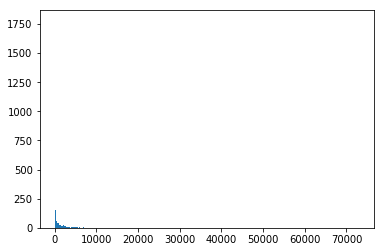

In [505]:
plt.hist(clicks,bins=1000)
plt.show()

In [506]:
np.max(clicks)

73063.0

In [507]:
categories = [
    "ad_id",
    "language_categories",
    "placement_categories",
    "interests_categories",
    "location_categories",
    "ad_copy",
    "ad_landing_page",
    "ad_targeting_location",
    "age_lower",
    "age_upper",
    "age",
    "placements",
    "ad_impressions",
    "ad_clicks",
    "ad_creation_date",
    "month",
    "year",
    "day",
    "ad_end_date",
    "extra_data",
    "interest_expansion",
    "excluded_connections",
    "language",
    "ad_spend_usd",
    "ad_spend_rub",
    "efficiency_clicks",
    "conversion_rate",
    "interests_categories_regex",
    "location_categories_regex",
    "date_order_index"
    ]

writer = csv.writer(open("full_data.csv", "w", newline=''))
writer.writerow(categories)

for ad in data:
    row = list()
    for category in categories:
        entry = ad[category]
        if type(entry) == type([]):
            entry = "\t".join(entry)
        row.append(entry)
    writer.writerow(row)

In [508]:
full_data = pd.read_csv("full_data.csv")

In [700]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(full_data["ad_targeting_location"])
    display(full_data["placement_categories"])
    

0                         Facebook
1                         Facebook
2                         Facebook
3                         Facebook
4                         Facebook
5                         Facebook
6                         Facebook
7                         Facebook
8                         Facebook
9                         Facebook
10                        Facebook
11                        Facebook
12                        Facebook
13                        Facebook
14                        Facebook
15                        Facebook
16                        Facebook
17                        Facebook
18                        Facebook
19                        Facebook
20                        Facebook
21                        Facebook
22                        Facebook
23                        Facebook
24                        Facebook
25                        Facebook
26                        Facebook
27                        Facebook
28                  

In [659]:
# campaign length
start_date = []
for row in full_data["ad_creation_date"]:
    if type(row) == float and np.isnan(row):
        start_date.append(0)
    else:
        start_date.append(datetime.strptime(row, '%m/%d/%Y'))
full_data["start_date"] = start_date

end_date = []
for row in full_data["ad_end_date"]:
    if type(row) == float and np.isnan(row):
        end_date.append(0)
    else:
        end_date.append(datetime.strptime(row, '%m/%d/%Y'))
full_data["end_date"] = end_date

# length of campaign
diff = []
for i in range(len(start_date)):
    if(type(end_date[i]) == int or type(start_date[i]) == int):
        diff.append(0)
    else:
        delta=(end_date[i] - start_date[i])
        diff.append(delta.days)
print(diff)
# for row in full_data.iterrows():
#     f_date = row["start_date"]
#     l_date = row["end_date"]
#     delta = l_date - f_date
#     diff.append(delta.days)
full_data["campaign_length"] = diff


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 4, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 2, 2, 2, 3, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 5, 1, 1, 1, 3, 1, 5, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 

In [510]:
# number of interests
n_interests = []
for row in full_data["interests_categories"]:
    if type(row) == float and np.isnan(row):
        n_interests.append(0)
    else:
        n_interests.append(1+row.count("\t"))
full_data["n_interests"] = n_interests

In [511]:
# length of post
post_length = []
for row in full_data["ad_copy"]:
    if type(row) == float and np.isnan(row):
        post_length.append(0)
    else:
        post_length.append(len(row))
full_data["post_length"] = post_length

In [512]:
# pennsylvania
pennsylvania = []
for row in full_data["ad_targeting_location"]:
    if type(row) == float and np.isnan(row):
        pennsylvania.append(0)
    else:
        pennsylvania.append(row.count("Pennsylvania"))
full_data["pennsylvania"] = pennsylvania

In [513]:
# wisconsin
wisconsin = []
for row in full_data["ad_targeting_location"]:
    if type(row) == float and np.isnan(row):
        wisconsin.append(0)
    else:
        wisconsin.append(row.count("Wisconsin"))
full_data["wisconsin"] = wisconsin

In [514]:
# michigan
michigan = []
for row in full_data["ad_targeting_location"]:
    if type(row) == float and np.isnan(row):
        michigan.append(0)
    else:
        michigan.append(row.count("Michigan"))
full_data["michigan"] = michigan

In [515]:
# florida
florida = []
for row in full_data["ad_targeting_location"]:
    if type(row) == float and np.isnan(row):
        florida.append(0)
    else:
        florida.append(row.count("Florida"))
full_data["florida"] = florida

In [793]:
np.unique(full_data["placement_categories"],return_counts=True)

(array(['Facebook', 'Facebook\tInstagram', 'Facebook\tThird Party Apps',
        'Facebook\tVideo', 'Instagram'], dtype=object),
 array([3276,   39,   18,   16,  168]))

In [803]:
real_spend = []
for row in full_data["ad_spend_usd"]:
    if type(row) == float and np.isnan(row):
        real_spend.append(0)
    else:
        real_spend.append(row)
full_data["real_spend"] = real_spend

In [701]:
# video
video = []
for row in full_data["placement_categories"]:
    if type(row) == float and np.isnan(row):
        video.append(0)
    else:
        video.append(row.count("Video"))
full_data["video"] = video

# third party apps
apps = []
for row in full_data["placement_categories"]:
    if type(row) == float and np.isnan(row):
        apps.append(0)
    else:
        apps.append(row.count("Third"))
full_data["apps"] = apps

In [702]:
# sort_data = full_data.sort_values(by='conversion_rate', ascending=False)
# sort_data.columns

In [703]:
np.unique(full_data["conversion_rate"],return_counts=True)
len(full_data["conversion_rate"]) - sum(np.isnan(full_data["conversion_rate"]))

2600

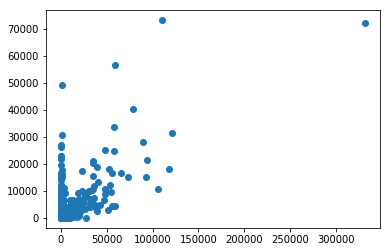

In [520]:
plt.scatter(full_data["ad_spend_rub"],full_data["ad_clicks"])
plt.show()

In [521]:
np.correlate(full_data["ad_spend_rub"],full_data["ad_clicks"])

array([nan])

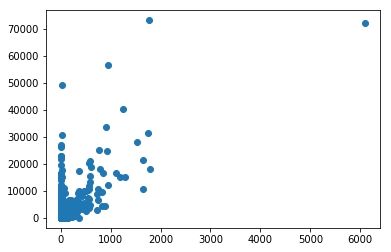

In [522]:
plt.scatter(full_data["ad_spend_usd"],full_data["ad_clicks"])
plt.show()

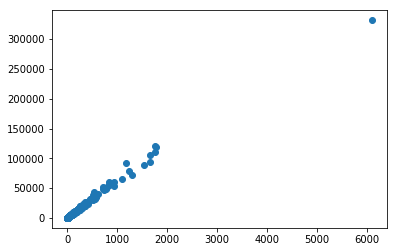

In [523]:
plt.scatter(full_data["ad_spend_usd"],full_data["ad_spend_rub"])
plt.show()

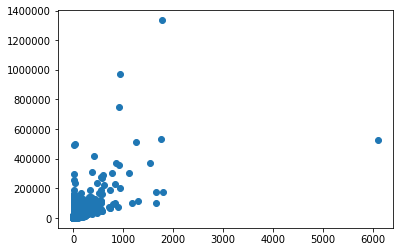

In [264]:
plt.scatter(full_data["ad_spend_usd"],full_data["ad_impressions"])
plt.show()

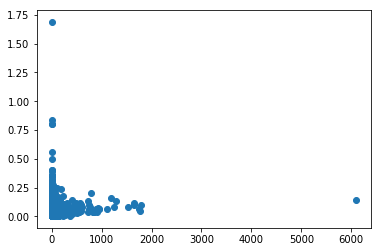

In [265]:
plt.scatter(full_data["ad_spend_usd"],full_data["conversion_rate"])
plt.show()

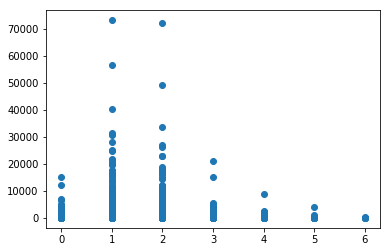

In [266]:
plt.scatter(full_data["n_interests"],full_data["ad_clicks"])
plt.show()

messing with whether more precise targeting by number of interests meant more conversions or clicks

In [268]:
new_df = pd.concat([full_data["n_interests"],full_data["conversion_rate"],full_data["ad_clicks"]], axis=1, keys=['n_interests', 'conversion_rate','ad_clicks'])
sm_df = new_df.dropna()
sm_df

,n_interests,conversion_rate,ad_clicks
0,0,0.06,43.0
1,0,0.07,47.0
2,0,0.04,47.0
3,1,0.07,10.0
4,0,0.05,26.0
5,1,0.06,42.0
6,1,0.03,23.0
7,1,0.08,97.0
8,1,0.05,55.0
9,1,0.10,73.0


In [277]:
X = np.array(sm_df["n_interests"]).reshape(-1, 1)
y = np.array(sm_df["conversion_rate"]).reshape(-1, 1)
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)

0.0016188017100601249
[[0.00401724]]


In [278]:
X = np.array(sm_df["n_interests"]).reshape(-1, 1)
y = np.array(sm_df["ad_clicks"]).reshape(-1, 1)
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)

0.0005717591954933487
[[-117.50838292]]


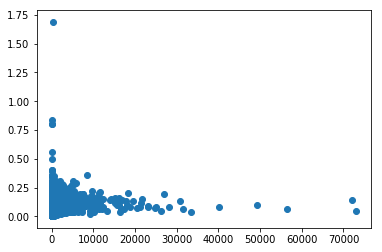

In [279]:
plt.scatter(full_data["ad_clicks"],full_data["conversion_rate"])

In [280]:
np.sum(full_data["ad_spend_usd"])

92698.37999999999

In [281]:
np.sum(full_data["ad_impressions"])

40552287.0

In [282]:
np.sum(full_data["ad_clicks"])

3733959.0

In [283]:
np.sum(full_data["ad_spend_rub"])

5875032.3

In [284]:
# each dollar bought 65 clicks!

are ads targeted to african americans more clicked on

In [527]:
# afam
afam = []
for row in full_data["interests_categories_regex"]:
    if type(row) == float and np.isnan(row):
        afam.append(0)
    else:
        afam.append(row.count("African American"))
full_data["afam"] = afam

In [528]:
new_df_2 = pd.concat([full_data["afam"],full_data["conversion_rate"],full_data["ad_clicks"]], axis=1, keys=['af_am', 'conversion_rate','ad_clicks'])
sm_df_2 = new_df_2.dropna()
sm_df_2

,af_am,conversion_rate,ad_clicks
0,0,0.06,43.0
1,0,0.07,47.0
2,0,0.04,47.0
3,1,0.07,10.0
4,0,0.05,26.0
5,1,0.06,42.0
6,1,0.03,23.0
7,1,0.08,97.0
8,1,0.05,55.0
9,1,0.10,73.0


In [529]:
X = np.array(sm_df_2["af_am"]).reshape(-1, 1)
y = np.array(sm_df_2["conversion_rate"]).reshape(-1, 1)
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)

0.0017210026133438472
[[0.00650325]]


what about length of ad

In [530]:
new_df_3 = pd.concat([full_data["post_length"],full_data["conversion_rate"],full_data["ad_clicks"]], axis=1, keys=['post_length', 'conversion_rate','ad_clicks'])
sm_df_3 = new_df_3.dropna()
#sm_df_3

In [531]:
X = np.array(sm_df_3["post_length"]).reshape(-1, 1)
y = np.array(sm_df_3["ad_clicks"]).reshape(-1, 1)
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)

0.012229987291556
[[-1.32264692]]


(array([1.677e+03, 2.870e+02, 1.870e+02, 1.130e+02, 7.800e+01, 6.100e+01,
        4.100e+01, 2.700e+01, 2.300e+01, 2.100e+01, 8.000e+00, 5.000e+00,
        9.000e+00, 9.000e+00, 4.000e+00, 8.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

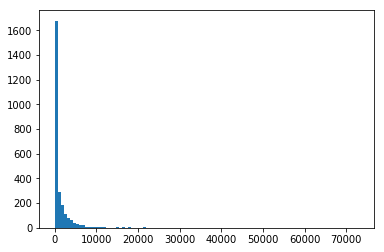

In [532]:
plt.hist(sm_df_3["ad_clicks"],bins = 100)

what about location

In [533]:
new_df_f = pd.concat([full_data["pennsylvania"],
                      full_data["wisconsin"],
                      full_data["michigan"],
                      full_data["florida"],
                      full_data["age_lower"],
                      full_data["age_upper"],
                      full_data["ad_spend_usd"],
                      full_data["afam"],
                      full_data["n_interests"],
                      full_data["post_length"],
                      full_data["conversion_rate"],
                      full_data["efficiency_clicks"],
                      full_data["ad_clicks"]], axis=1, keys=['pennsylvania',
                                                             'wisconsin',
                                                             'michigan',
                                                             'florida',
                                                             'age_lower',
                                                             'age_upper',
                                                             'ad_spend_usd',
                                                             'afam',
                                                             'n_interests',
                                                             'post_length',
                                                             'conversion_rate',
                                                             'efficiency_clicks',
                                                             'ad_clicks'])
sm_df_f = new_df_f.dropna()
X = pd.concat([sm_df_f["pennsylvania"],
                      sm_df_f["wisconsin"],
                      sm_df_f["michigan"],
                      sm_df_f["florida"],
                      sm_df_f["age_lower"],
                      sm_df_f["age_upper"],
                      sm_df_f["ad_spend_usd"],
                      sm_df_f["afam"],
                      sm_df_f["n_interests"],
                      sm_df_f["post_length"]], axis=1, keys=['pennsylvania',
                                                             'wisconsin',
                                                             'michigan',
                                                             'florida',
                                                             'age_lower',
                                                             'age_upper',
                                                             'ad_spend_usd',
                                                             'afam',
                                                             'n_interests',
                                                             'post_length'])
y = np.array(sm_df_f["conversion_rate"]).reshape(-1, 1)

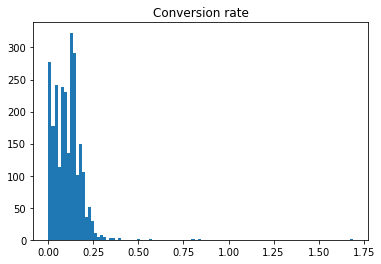

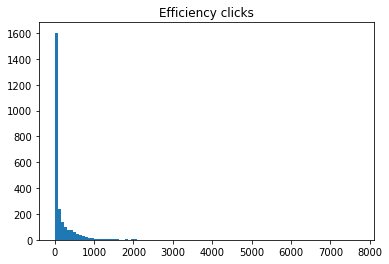

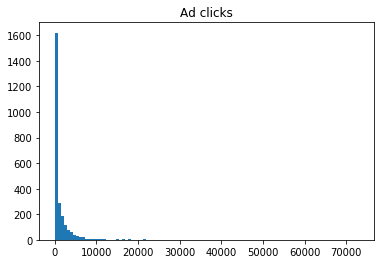

In [534]:
plt.hist(sm_df_f["conversion_rate"],bins=100)
plt.title("Conversion rate")
plt.show()
plt.hist(sm_df_f["efficiency_clicks"],bins=100)
plt.title("Efficiency clicks")
plt.show()
plt.hist(sm_df_f["ad_clicks"],bins=100)
plt.title("Ad clicks")
plt.show()

In [311]:
reg = LinearRegression().fit(X,y)
print(reg.score(X,y))
print(np.sqrt(reg.score(X,y)))
print(reg.coef_)

0.06574359391021134
0.2564051362789196
[[-3.09063068e-02 -4.50763450e-02 -2.38329389e-02 -4.39880129e-02
  -1.31793165e-03  4.68361378e-05 -2.52329456e-05  2.66173721e-03
   3.70812407e-03  6.15862929e-06]]


**add more features**

In [535]:
# ad copy
# viral
viral = []
for row in full_data["ad_copy"]:
    if type(row) == float and np.isnan(row):
        viral.append(0)
    else:
        viral.append(row.count("viral")+row.count("Viral")+row.count("VIRAL"))
full_data["viral"] = viral

# trump
trump = []
for row in full_data["ad_copy"]:
    if type(row) == float and np.isnan(row):
        trump.append(0)
    else:
        trump.append(row.count("trump")+row.count("Trump")+row.count("TRUMP"))
full_data["trump"] = trump

# death
death = []
for row in full_data["ad_copy"]:
    if type(row) == float and np.isnan(row):
        death.append(0)
    else:
        death.append(row.count("death")+row.count("Death")+row.count("DEATH")+row.count("dead")+row.count("Dead")+row.count("DEAD")+row.count("die")+row.count("Die")+row.count("DIE")+row.count("kill")+row.count("Kill")+row.count("KILL"))
full_data["death"] = death

# exclam
exclam = []
for row in full_data["ad_copy"]:
    if type(row) == float and np.isnan(row):
        exclam.append(0)
    else:
        exclam.append(row.count("!"))
full_data["exclam"] = exclam

# language
# arabic
arabic = []
for row in full_data["language"]:
    if type(row) == float and np.isnan(row):
        arabic.append(0)
    else:
        arabic.append(row.count("Arabic"))
full_data["arabic"] = arabic

# spanish
spanish = []
for row in full_data["language"]:
    if type(row) == float and np.isnan(row):
        spanish.append(0)
    else:
        spanish.append(row.count("Spanish"))
full_data["spanish"] = spanish

In [567]:
# conservative
conservative = []
for row in full_data["interests_categories_regex"]:
    if type(row) == float and np.isnan(row):
        conservative.append(0)
    else:
        conservative.append(row.count("Conservative")+row.count("Christian")+row.count("Anti-Immigrant")+row.count("Patriotism"))
full_data["conservative"] = conservative

# progressive
progressive = []
for row in full_data["interests_categories_regex"]:
    if type(row) == float and np.isnan(row):
        progressive.append(0)
    else:
        progressive.append(row.count("Progressive"))
full_data["progressive"] = progressive

# latinx
latinx = []
for row in full_data["interests_categories_regex"]:
    if type(row) == float and np.isnan(row):
        latinx.append(0)
    else:
        latinx.append(row.count("Latinx"))
full_data["latinx"] = latinx

# gun
gun = []
for row in full_data["interests_categories_regex"]:
    if type(row) == float and np.isnan(row):
        gun.append(0)
    else:
        gun.append(row.count("Gun"))
full_data["gun"] = gun




In [568]:
sum(full_data["gun"])

115

**okay....let's just get a predictive model all up in here**

In [804]:
new_df_f = pd.concat([full_data["pennsylvania"],
                      full_data["wisconsin"],
                      full_data["michigan"],
                      full_data["florida"],
                      full_data["age_lower"],
                      full_data["age_upper"],
                      full_data["real_spend"],
                      #full_data["ad_spend_usd"],
                      full_data["afam"],
                      full_data["n_interests"],
                      full_data["post_length"],
                      full_data["viral"],
                      full_data["trump"],
                      full_data["death"],
                      full_data["exclam"],
                      full_data["year"],
                      full_data["arabic"],
                      full_data["spanish"],
                      full_data["conservative"],
                      full_data["progressive"],
                      full_data["latinx"],
                      full_data["gun"],
                      full_data["video"],
                      full_data["apps"],
                      full_data["campaign_length"],
                      full_data["date_order_index"],
                      full_data["conversion_rate"],
                      full_data["efficiency_clicks"],
                      full_data["ad_impressions"],
                      full_data["ad_clicks"]], axis=1, keys=['pennsylvania',
                                                             'wisconsin',
                                                             'michigan',
                                                             'florida',
                                                             'age_lower',
                                                             'age_upper',
                                                             'real_spend',
                                                             #'ad_spend_usd',
                                                             'afam',
                                                             'n_interests',
                                                             'post_length',
                                                             'viral',
                                                             'exclam',
                                                             'trump',
                                                             'death',
                                                             'year',
                                                             'arabic',
                                                             'spanish',
                                                             'conservative',
                                                             'progressive',
                                                             'latinx',
                                                             'gun',
                                                             'video',
                                                             'apps',
                                                             'campaign_length',
                                                             'date_order_index',
                                                             'conversion_rate',
                                                             'efficiency_clicks',
                                                             'ad_impressions',
                                                             'ad_clicks'])

# drop empty rows
sm_df_f = new_df_f.dropna()

# also get rid of the one outlier in conversion_rate since it must be less than 1
for index, row in new_df_f.iterrows():
    if(row["conversion_rate"] > 1):
        sm_df_f.loc[index,"conversion_rate"] = 1

sm_df_f = sm_df_f[sm_df_f.conversion_rate < 1]


X = pd.concat([sm_df_f["pennsylvania"],
                      sm_df_f["wisconsin"],
                      sm_df_f["michigan"],
                      sm_df_f["florida"],
                      sm_df_f["age_lower"],
                      sm_df_f["age_upper"],
                    sm_df_f["real_spend"],
                      #sm_df_f["ad_spend_usd"],
                      sm_df_f["afam"],
                      sm_df_f["n_interests"],
                      sm_df_f["post_length"],
                      sm_df_f["viral"],
                      sm_df_f["trump"],
                      sm_df_f["death"],
                      sm_df_f["exclam"],
                      sm_df_f["year"],
                      sm_df_f["arabic"],
                      sm_df_f["spanish"],
                      sm_df_f["conservative"],
                      sm_df_f["progressive"],
                      sm_df_f["latinx"],
                      sm_df_f["gun"],
                      sm_df_f["video"],
                      sm_df_f["apps"],               
                      sm_df_f["campaign_length"],
                      sm_df_f["ad_impressions"],                    
                      sm_df_f["date_order_index"]], axis=1, keys=['pennsylvania',
                                                             'wisconsin',
                                                             'michigan',
                                                             'florida',
                                                             'age_lower',
                                                             'age_upper',
                                                             'ad_spend_usd',
                                                             'afam',
                                                             'n_interests',
                                                             'post_length',
                                                             'viral',
                                                             'exclam',
                                                             'trump',
                                                             'death',
                                                             'year',
                                                            'arabic',
                                                            'spanish',
                                                            'conservative',
                                                            'progressive',
                                                            'latinx',
                                                            'gun',
                                                            'video',
                                                            'apps',
                                                            'campaign_length',
                                                            'ad_impressions',
                                                            'date_order_index'])
y = np.array(sm_df_f["ad_clicks"]).reshape(-1, 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [805]:
len(y)

2543

In [806]:
# train/val split on all data, 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2, random_state=42)

In [807]:
print(X_train.shape,X_test.shape)

(2034, 26) (509, 26)


In [808]:
reg = LinearRegression().fit(X_train,y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))
print(np.sqrt(reg.score(X_train,y_train)))
print(reg.coef_)

0.8534566344286344
0.7453560338830629
0.9238271669682779
[[-2.40565838e+02  6.28376486e+01 -3.25323816e+02 -1.20178814e+02
  -4.80837644e+00  3.16214332e-01  4.87523970e+00  2.85758260e+02
  -1.76870091e+02  2.26757307e-01  4.94738203e+02 -5.99965419e+01
  -7.84791493e+01 -1.83736918e+02  1.90042596e+02 -3.64686076e+02
  -1.42033908e+03  1.66765220e+02  5.46276380e+02  1.34727611e+03
  -1.63251396e+02  2.23443211e+02 -2.26460877e+03 -3.47067733e+00
   5.46767374e-02  2.30687859e-01]]


In [733]:
from sklearn.feature_selection import RFE
selector = RFE(reg, 5, step=1)
selector = selector.fit(X_train, y_train)
first = selector.ranking_
second = X.columns
print(selector.ranking_)
print(X.columns)
feat_rank = pd.DataFrame([first,second])
for row in feat_rank.iterrows():
    print(row)

[ 1  7  6  4 16 19 17 10 12 21  1 13 15 14  9  5  1 11  3  1  8  2  1 18
 22 20]
Index(['pennsylvania', 'wisconsin', 'michigan', 'florida', 'age_lower',
       'age_upper', 'ad_spend_usd', 'afam', 'n_interests', 'post_length',
       'viral', 'exclam', 'trump', 'death', 'year', 'arabic', 'spanish',
       'conservative', 'progressive', 'latinx', 'gun', 'video', 'apps',
       'campaign_length', 'ad_impressions', 'date_order_index'],
      dtype='object')
(0, 0      1
1      7
2      6
3      4
4     16
5     19
6     17
7     10
8     12
9     21
10     1
11    13
12    15
13    14
14     9
15     5
16     1
17    11
18     3
19     1
20     8
21     2
22     1
23    18
24    22
25    20
Name: 0, dtype: object)
(1, 0         pennsylvania
1            wisconsin
2             michigan
3              florida
4            age_lower
5            age_upper
6         ad_spend_usd
7                 afam
8          n_interests
9          post_length
10               viral
11              exclam

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [809]:
reg2 = ElasticNet().fit(X_train,y_train)
print(reg2.score(X_train,y_train))
print(reg2.score(X_test,y_test))
print(np.sqrt(reg2.score(X_train,y_train)))
print(reg2.coef_)

0.8453026149064076
0.7288959816826571
0.9194034016178141
[-1.17510126e+00 -0.00000000e+00 -7.21800523e+00 -7.40130519e+00
 -9.22560055e+00  3.65013110e-01  4.69973887e+00  6.72280548e+00
 -7.86571284e+01  8.71754427e-02  1.22920765e+01 -1.10252527e+01
 -8.05648537e+01 -5.63862096e+01  3.13908650e+01 -8.55243192e+00
 -1.45745149e+01 -1.52352118e+01  8.55362375e+01  1.19024245e+02
 -1.81177960e+01  0.00000000e+00 -9.64414656e+00 -6.67542348e+00
  5.49514477e-02  4.26215171e-01]


In [810]:
selector = RFE(reg2, 5, step=1)
selector = selector.fit(X_train, y_train)
first = selector.ranking_
second = X.columns
print(selector.ranking_)
print(X.columns)
feat_rank = pd.DataFrame([first,second])
for row in feat_rank.iterrows():
    print(row)

[14 22  9  7  5 17 12 11  1 18  6  1  3  4  1  8  2 10  1  1 13 21 19 15
 20 16]
Index(['pennsylvania', 'wisconsin', 'michigan', 'florida', 'age_lower',
       'age_upper', 'ad_spend_usd', 'afam', 'n_interests', 'post_length',
       'viral', 'exclam', 'trump', 'death', 'year', 'arabic', 'spanish',
       'conservative', 'progressive', 'latinx', 'gun', 'video', 'apps',
       'campaign_length', 'ad_impressions', 'date_order_index'],
      dtype='object')
(0, 0     14
1     22
2      9
3      7
4      5
5     17
6     12
7     11
8      1
9     18
10     6
11     1
12     3
13     4
14     1
15     8
16     2
17    10
18     1
19     1
20    13
21    21
22    19
23    15
24    20
25    16
Name: 0, dtype: object)
(1, 0         pennsylvania
1            wisconsin
2             michigan
3              florida
4            age_lower
5            age_upper
6         ad_spend_usd
7                 afam
8          n_interests
9          post_length
10               viral
11              exclam

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [811]:
# baseline
npm = np.mean(y)
p_base = []
for i in range(len(y_train)):
    p_base.append(npm)
print(r2_score(p_base,y_train))
p_base2 = []
for i in range(len(y_test)):
    p_base2.append(npm)
print(r2_score(p_base2,y_test))

-7.998250246816867e+31
-4.681842914606366e+31


In [812]:
#rf = RandomForestRegressor(oob_score=True).fit(X_train,y_train)
#print("Validation Accuracy:",rf.oob_score_)
rf = RandomForestRegressor().fit(X_train,y_train)
print("Training Accuracy:",r2_score(rf.predict(X_train), y_train))
print("Validation Accuracy:",r2_score(rf.predict(X_test), y_test))

Training Accuracy: 0.9642340922618406
Validation Accuracy: 0.8743033635996958


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [737]:
selector = RFE(rf, 1, step=1)
selector = selector.fit(X_train, y_train)
first = selector.ranking_
second = X.columns
print(selector.ranking_)
print(X.columns)
feat_rank = pd.DataFrame([first,second])
for row in feat_rank.iterrows():
    print(row)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26 25 20 21  5 13  2  6 10  4 17 15  7 16 12 24 22  9 11 14 18 23 19  8
  1  3]
Index(['pennsylvania', 'wisconsin', 'michigan', 'florida', 'age_lower',
       'age_upper', 'ad_spend_usd', 'afam', 'n_interests', 'post_length',
       'viral', 'exclam', 'trump', 'death', 'year', 'arabic', 'spanish',
       'conservative', 'progressive', 'latinx', 'gun', 'video', 'apps',
       'campaign_length', 'ad_impressions', 'date_order_index'],
      dtype='object')
(0, 0     26
1     25
2     20
3     21
4      5
5     13
6      2
7      6
8     10
9      4
10    17
11    15
12     7
13    16
14    12
15    24
16    22
17     9
18    11
19    14
20    18
21    23
22    19
23     8
24     1
25     3
Name: 0, dtype: object)
(1, 0         pennsylvania
1            wisconsin
2             michigan
3              florida
4            age_lower
5            age_upper
6         ad_spend_usd
7                 afam
8          n_interests
9          post_length
10               viral
11              exclam

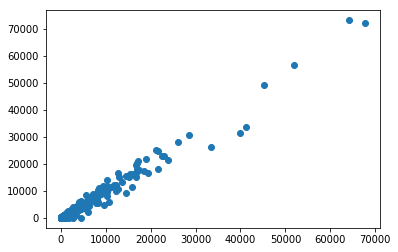

In [738]:
plt.scatter(rf.predict(X_train), y_train)

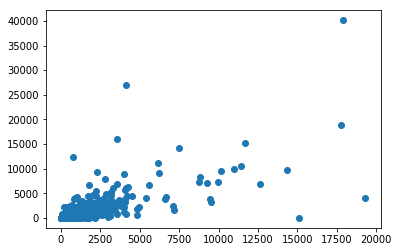

In [564]:
plt.scatter(rf.predict(X_test), y_test)

In [565]:
# classify by depth
def treeRegressorByDepth(depth, X_train, y_train, cvt = 5):
    model = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    return cross_val_score(model, X_train, y_train, cv = cvt)

In [566]:
# 5-fold CV
means = []
lower = []
upper = []
sds = []
trains = []
for i in range(1, 20):
    # fit model
    tc = treeRegressorByDepth(i, X_train, y_train)
    # calc mean and sd
    cur_mean = np.mean(tc)
    cur_sd = np.std(tc)
    train_val = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train).score(X_train,y_train)
    # add to lists
    trains.append(train_val)
    means.append(cur_mean)
    lower.append(cur_mean - 2*cur_sd)
    upper.append(cur_mean + 2*cur_sd)

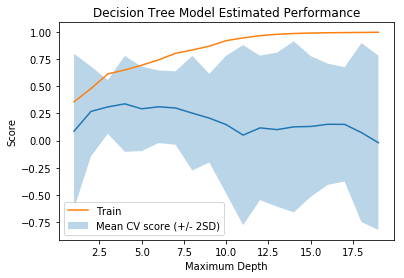

In [500]:
# plot   
plt.plot(range(1,20),means)
plt.fill_between(range(1,20), lower, upper, alpha = 0.3, label = "Mean CV score (+/- 2SD)")
plt.plot(range(1,20), trains, label="Train")
plt.title("Decision Tree Model Estimated Performance")
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [482]:
# cross validation performance
train_score = means[0]
print("Mean score train: ",train_score)
print("Mean +/- 2 SD: (", lower[0],",",upper[0],")")

Mean score train:  0.08670878121013952
Mean +/- 2 SD: ( -0.6243121666833109 , 0.7977297291035899 )


In [788]:
# holdout set performance
model_dec_tree = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)
train_score = model_dec_tree.score(X_train, y_train)
print("Mean score train: ", train_score)
val_score = model_dec_tree.score(X_test, y_test)
print("Mean score val: ", val_score)

Mean score train:  0.9631639932159944
Mean score val:  0.5781062442301835


## word counter

In [453]:
def word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    
    return counts

In [460]:
counts = word_count(full_data['ad_copy'])

AttributeError: 'Series' object has no attribute 'split'

In [459]:
print(min(counts))

hey


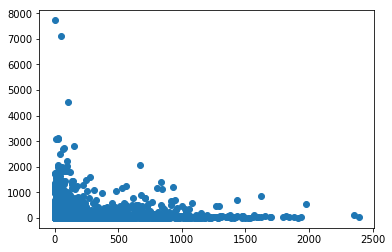

In [463]:
plt.scatter(full_data["post_length"],full_data["efficiency_clicks"])

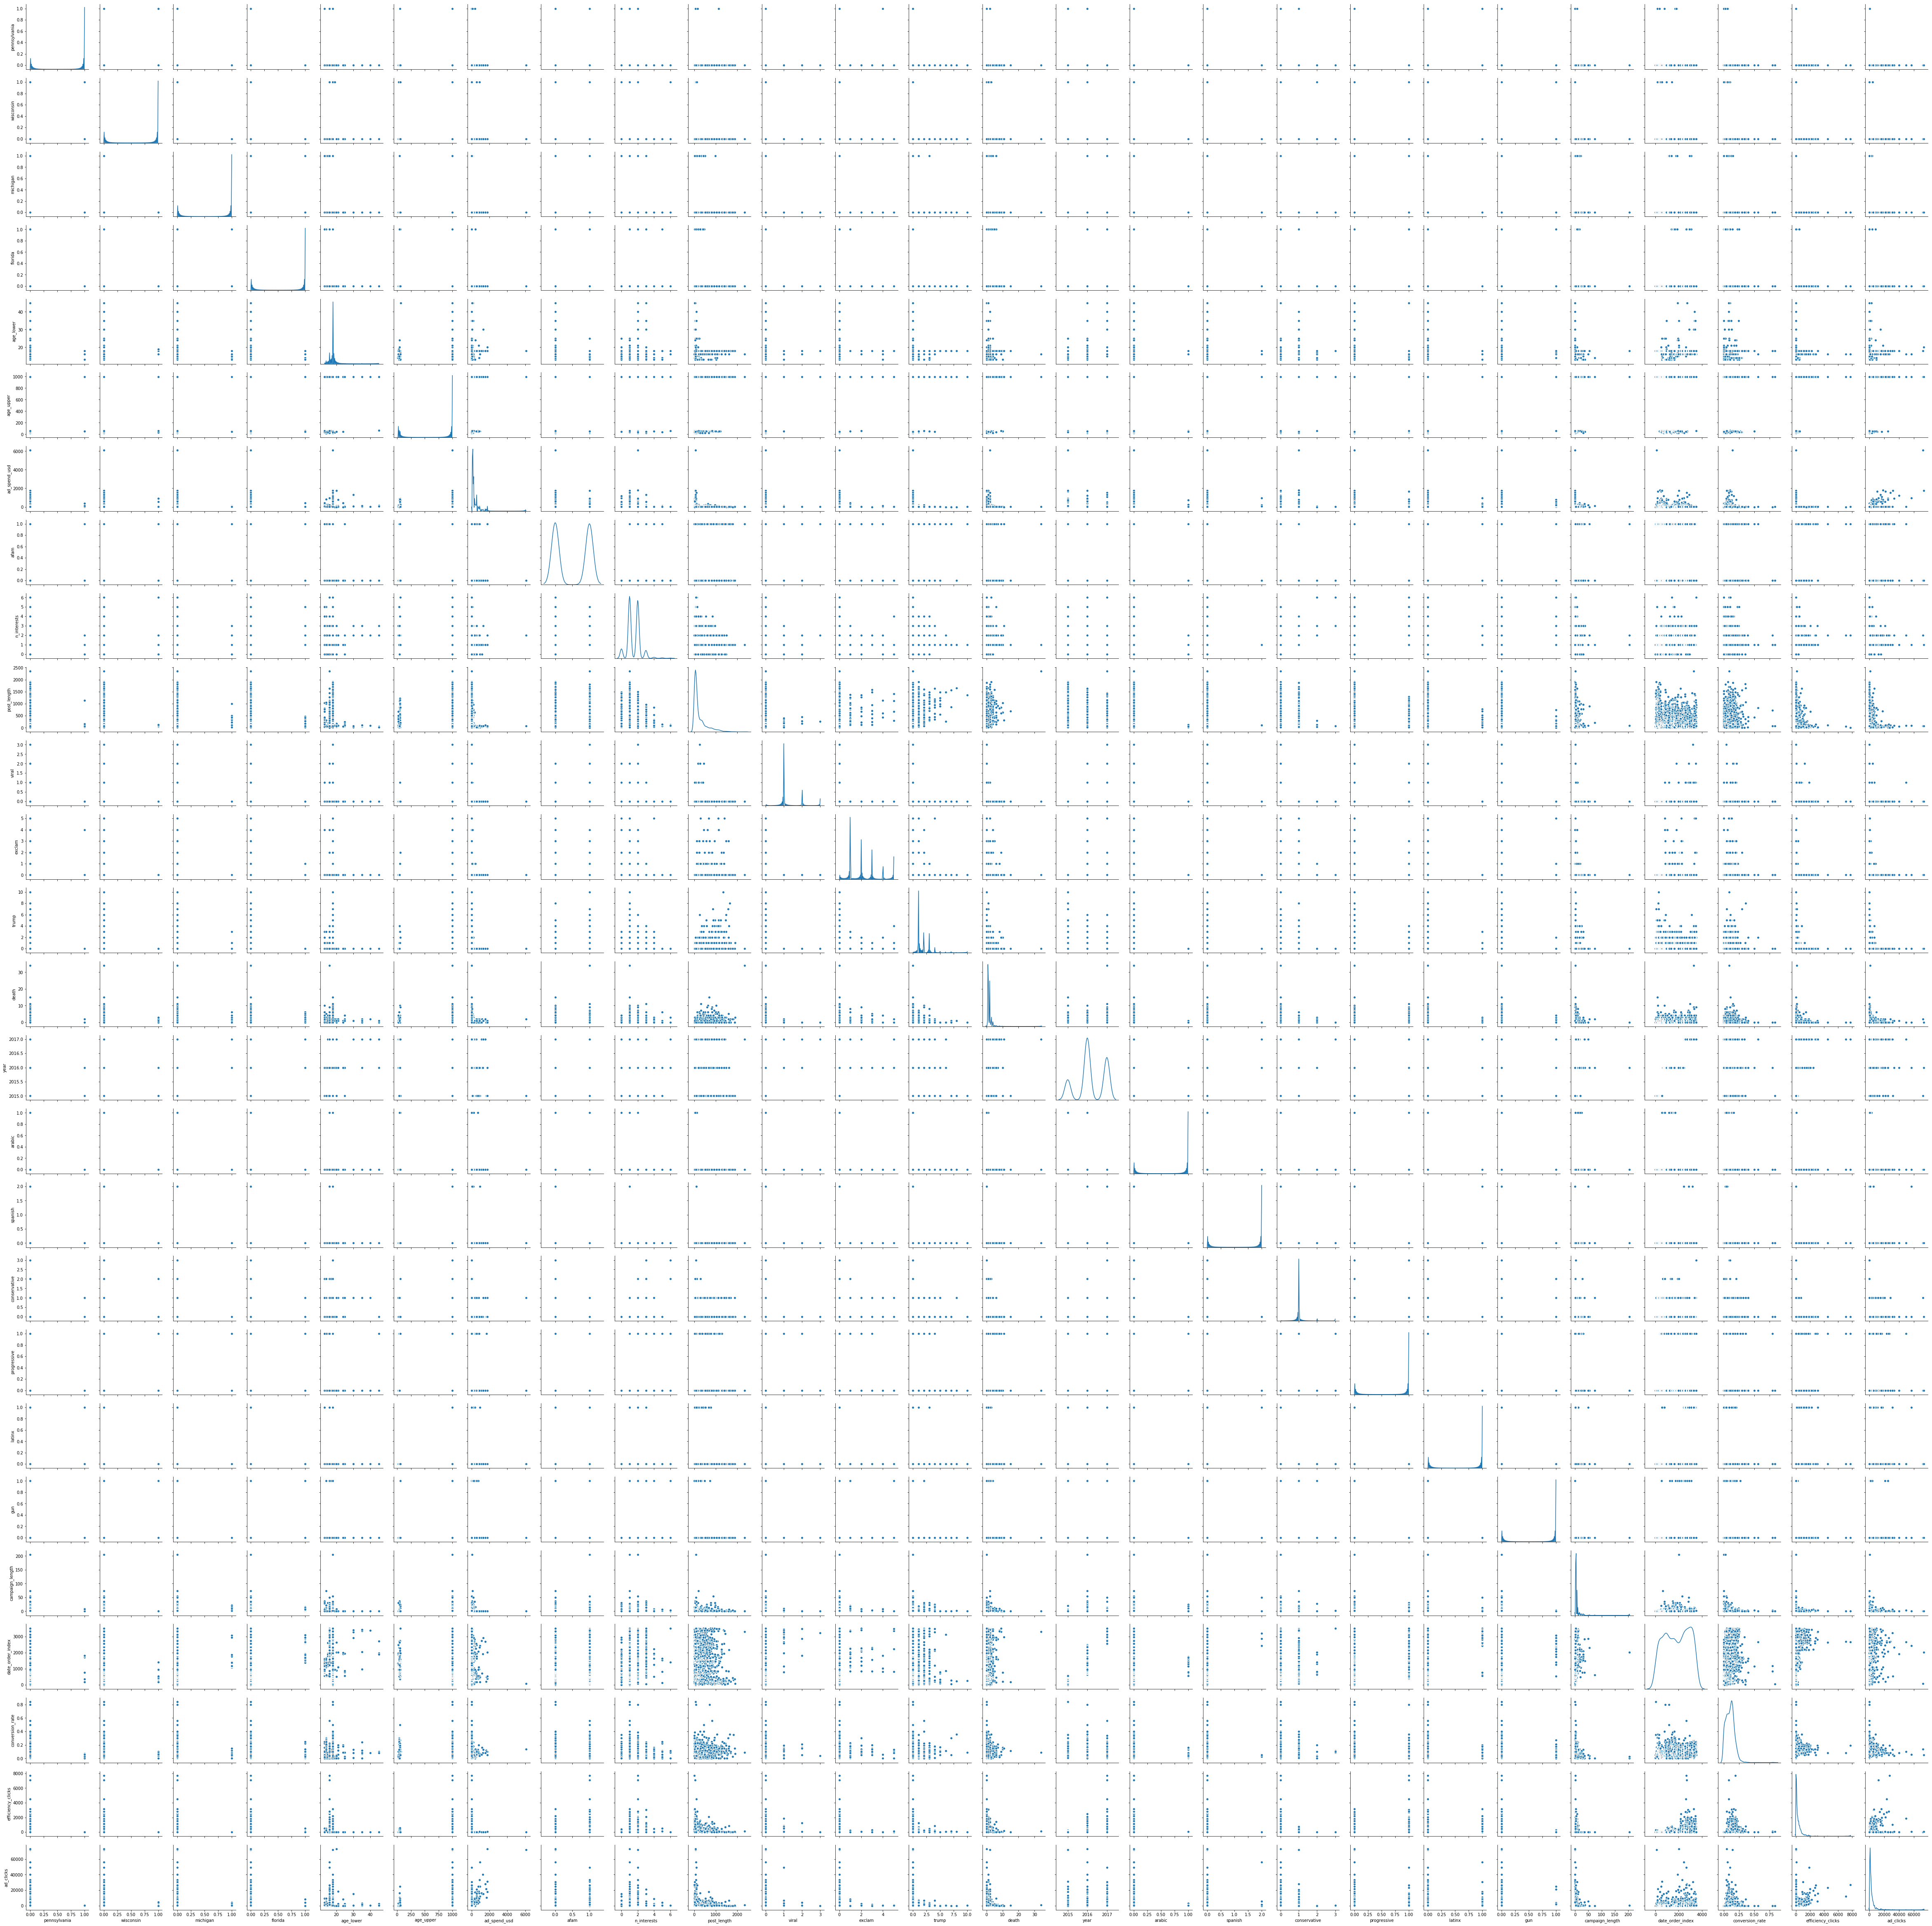

In [664]:
# pair plots
ax = sns.pairplot(sm_df_f, diag_kind="kde")
ax
plt.show()

In [740]:
# adaboost

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


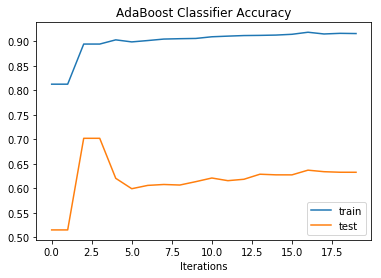

Maximum training accuracy is 0.9180902387329474 at 16 iterationsMaximum validation accuracy is 0.701979114096321 at 2 iterations 



In [781]:
abc = AdaBoostRegressor(n_estimators=20)
abc.fit(X_train, y_train)
abc_predicts_train = list(abc.staged_score(X_train, y_train))
plt.plot(abc_predicts_train, label = "train");
# staged_score test to plot
abc_predicts_test = list(abc.staged_score(X_test,y_test))
plt.plot(abc_predicts_test, label = "test");
plt.legend()
plt.title("AdaBoost Classifier Accuracy")
plt.xlabel("Iterations")
plt.show()
print("Maximum training accuracy is "+str(max(abc_predicts_train))+" at "+str(abc_predicts_train.index(max(abc_predicts_train)))+" iterations" + 
     "Maximum validation accuracy is "+str(max(abc_predicts_test))+" at "+str(abc_predicts_test.index(max(abc_predicts_test)))+" iterations \n")


In [748]:
abc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.50985943e-02, 0.00000000e+00, 3.99219343e-02, 1.59259484e-02,
       0.00000000e+00, 7.01614884e-03, 5.66586103e-04, 0.00000000e+00,
       8.35267367e-03, 0.00000000e+00, 7.12156722e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.74148832e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13445388e-03,
       8.92215632e-01, 8.38172344e-03])

In [749]:
first = abc.feature_importances_
second = X.columns
print(selector.ranking_)
print(X.columns)
feat_rank = pd.DataFrame([first,second])
for row in feat_rank.iterrows():
    print(row)

[26 25 20 21  5 13  2  6 10  4 17 15  7 16 12 24 22  9 11 14 18 23 19  8
  1  3]
Index(['pennsylvania', 'wisconsin', 'michigan', 'florida', 'age_lower',
       'age_upper', 'ad_spend_usd', 'afam', 'n_interests', 'post_length',
       'viral', 'exclam', 'trump', 'death', 'year', 'arabic', 'spanish',
       'conservative', 'progressive', 'latinx', 'gun', 'video', 'apps',
       'campaign_length', 'ad_impressions', 'date_order_index'],
      dtype='object')
(0, 0               0
1               0
2               0
3               0
4       0.0250986
5               0
6       0.0399219
7       0.0159259
8               0
9      0.00701615
10    0.000566586
11              0
12     0.00835267
13              0
14    0.000712157
15              0
16              0
17              0
18              0
19    0.000674149
20              0
21              0
22              0
23     0.00113445
24       0.892216
25     0.00838172
Name: 0, dtype: object)
(1, 0         pennsylvania
1            wisco